# Campus Placement Prediction

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
# separate out categorical and numerical features

cat_vars = list(df.select_dtypes(include=["object"]).columns)
num_vars = list(df.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns)

print(cat_vars, num_vars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
# check null values

df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df.shape

(215, 15)

In [7]:
def plot_dist(col):
  plt.figure(figsize=(14,7))
  sns.distplot(df["salary"], kde=True, hist=False, label="Actual Salary", color="Green")
  sns.distplot(df[col], kde=True, hist=False, label=col, color="Black")

In [8]:
most_freq = list(dict(df["salary"].value_counts()).items())[0]
most_freq

(300000.0, 22)

In [9]:
df["salary"].mode()[0]

300000.0

In [10]:
df["salary_mean"] = df["salary"].fillna(df["salary"].mean())
df["salary_median"] = df["salary"].fillna(df["salary"].median())
df["salary_mode"] = df["salary"].fillna(df["salary"].mode())

df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

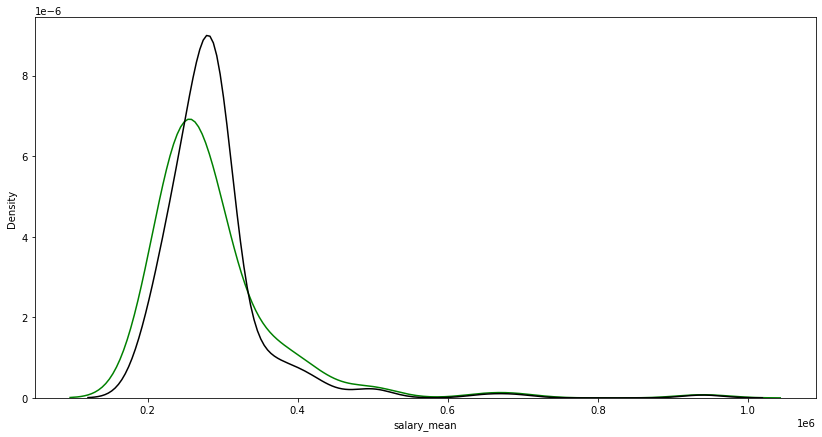

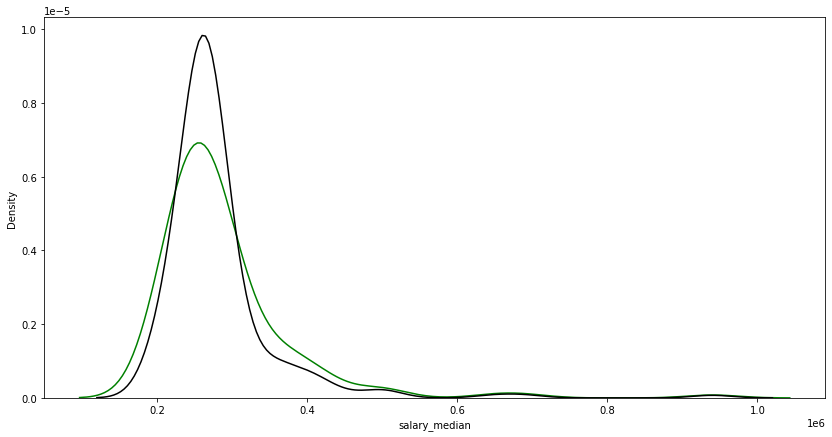

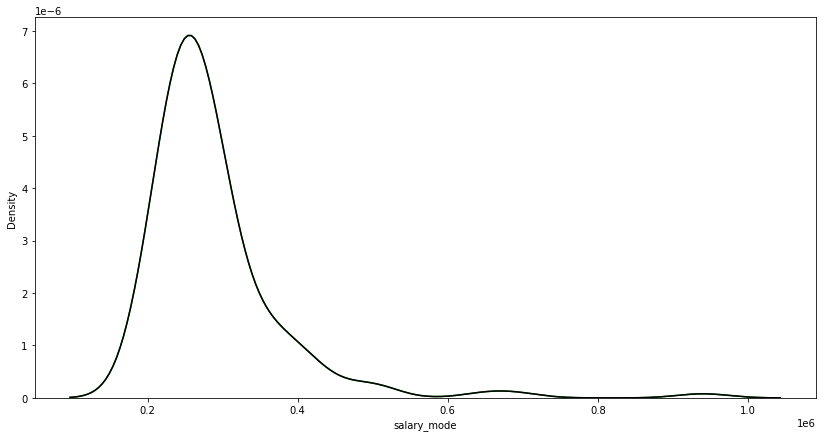

In [11]:
sal_list = ["salary_mean", "salary_median", "salary_mode"]
for sal in sal_list:
  plot_dist(sal)

In [12]:
# fill salary with mean

df["salary"] = df["salary"].fillna(df["salary"].mean())
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [13]:
df = df.drop(columns=["salary_mean", "salary_median", "salary_mode"], axis = 1)
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


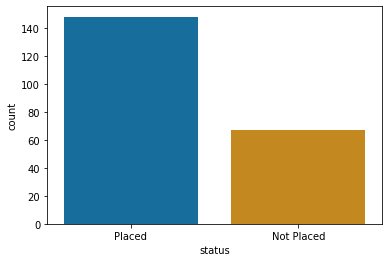

In [14]:
sns.countplot(df["status"], palette="colorblind")

Countplot for feature gender


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


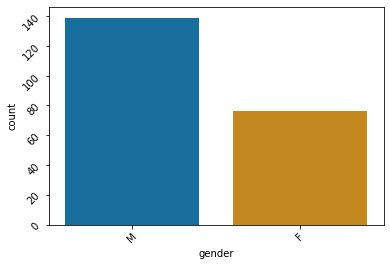

Countplot for feature ssc_b


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


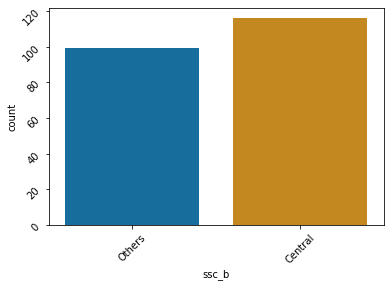

Countplot for feature hsc_b


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


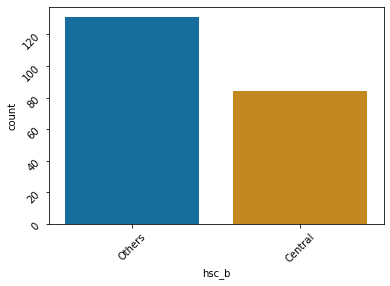

Countplot for feature hsc_s


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


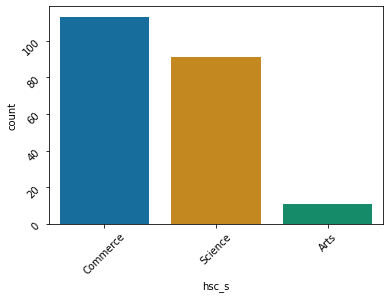

Countplot for feature degree_t


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


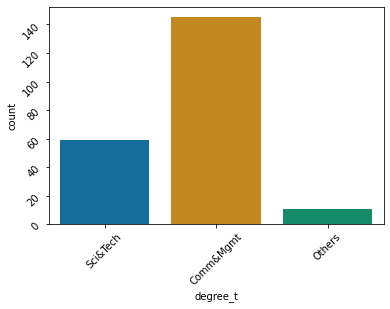

Countplot for feature workex


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


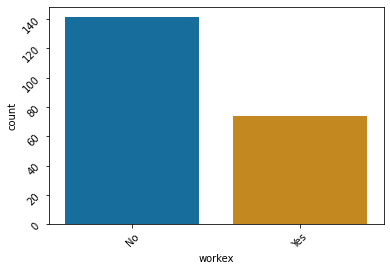

Countplot for feature specialisation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


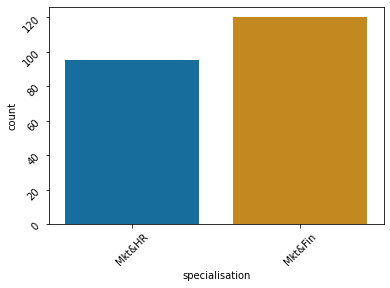

Countplot for feature status


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


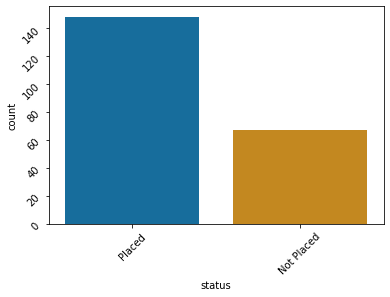

In [15]:
def value_count(col):
  return dict(df[col].value_counts())

def count_plot(col):
  sns.countplot(df[col], palette = "colorblind")
  plt.xticks(rotation = "45", fontsize="10")
  plt.yticks(rotation = "45", fontsize = "10")
  plt.show()

for col in cat_vars:
  print(f"Countplot for feature {col}")
  count_plot(col)
  print("="*100)

In [16]:
final_dict = {}
for col in cat_vars:
  final_dict[col] = value_count(col)

final_dict

{'degree_t': {'Comm&Mgmt': 145, 'Others': 11, 'Sci&Tech': 59},
 'gender': {'F': 76, 'M': 139},
 'hsc_b': {'Central': 84, 'Others': 131},
 'hsc_s': {'Arts': 11, 'Commerce': 113, 'Science': 91},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'ssc_b': {'Central': 116, 'Others': 99},
 'status': {'Not Placed': 67, 'Placed': 148},
 'workex': {'No': 141, 'Yes': 74}}

In [17]:
# top science students placed

df[(df["degree_t"]=="Sci&Tech")&(df["status"]=="Placed")].sort_values(by = "salary", ascending = False).reset_index().head(10)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.0,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.0,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.2,Mkt&HR,76.26,Placed,400000.0
8,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed,360000.0
9,70,71,M,82.00,Others,61.00,Others,Science,62.00,Sci&Tech,No,89.0,Mkt&Fin,65.45,Placed,360000.0


In [18]:
df[(df["degree_t"]=="Comm&Mgmt")&(df["status"]=="Placed")].sort_values(by = "salary", ascending = False).reset_index().head(10)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.60,Others,82.00,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
5,85,86,F,83.84,Others,89.83,Others,Commerce,77.2,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.0,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.0,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,57,58,M,68.00,Central,76.00,Central,Commerce,74.0,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0
9,104,105,M,69.00,Central,63.00,Others,Science,65.0,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0


In [19]:
# max and min salary
df[(df["salary"]==max(df["salary"])) | (df["salary"]==min(df["salary"]))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [20]:
# students with a salary which is more than the average in the science department

df[(df["degree_t"]=="Sci&Tech")&(df["salary"]>df["salary"].mean())].sort_values(by = "salary", ascending = False).reset_index().head(10)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0


In [21]:
# students with a salary which is more than the average in the Comm&Mgmt dept. 

df[(df["degree_t"]=="Comm&Mgmt")&(df["salary"]>df["salary"].mean())].sort_values(by = "salary", ascending = False).reset_index().head(10)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,85,86,F,83.84,Others,89.83,Others,Commerce,77.2,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
5,210,211,M,80.60,Others,82.00,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.0,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.0,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,104,105,M,69.00,Central,63.00,Others,Science,65.0,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0
9,57,58,M,68.00,Central,76.00,Central,Commerce,74.0,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0


In [22]:

df.groupby(["degree_t"])["status"].count()

degree_t
Comm&Mgmt    145
Others        11
Sci&Tech      59
Name: status, dtype: int64

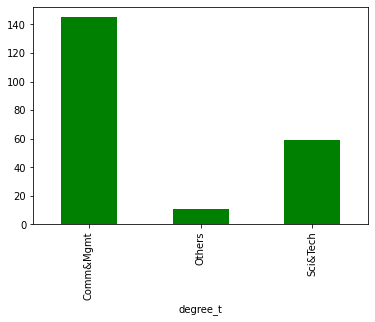

In [23]:
# most students that are placed are from comm&mgmt

df.groupby(["degree_t"])["status"].count().plot(kind = "bar", color="Green")

In [24]:
df.groupby(["specialisation"])["status"].count()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: status, dtype: int64

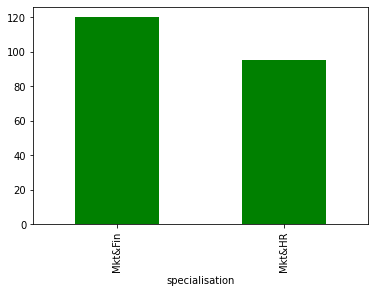

In [25]:
# marketing and finance specialisations have a higher rate of placement

df.groupby(["specialisation"])["status"].count().plot(kind = "bar", color="Green")

In [26]:
df.groupby(["gender"])["status"].count()

gender
F     76
M    139
Name: status, dtype: int64

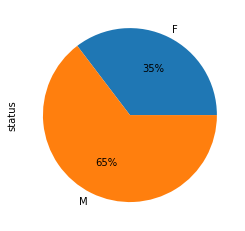

In [27]:
df.groupby(["gender"])["status"].count().plot(kind = "pie", autopct = "%1.0f%%")

In [28]:
# maximum female salary

temp = df[df["gender"]=="F"]
temp[temp["salary"]==max(temp["salary"])].style.background_gradient(cmap="plasma")

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


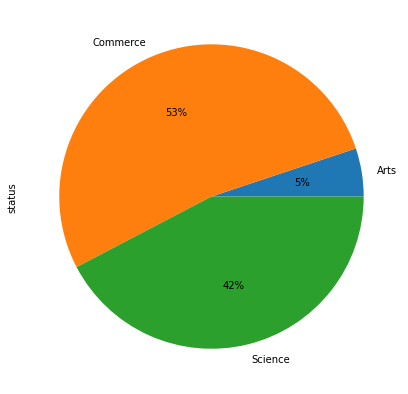

In [29]:
df.groupby(["hsc_s"])["status"].count().plot(kind = "pie", autopct="%1.0f%%", figsize=(15,7))

In [30]:
final_dict

{'degree_t': {'Comm&Mgmt': 145, 'Others': 11, 'Sci&Tech': 59},
 'gender': {'F': 76, 'M': 139},
 'hsc_b': {'Central': 84, 'Others': 131},
 'hsc_s': {'Arts': 11, 'Commerce': 113, 'Science': 91},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'ssc_b': {'Central': 116, 'Others': 99},
 'status': {'Not Placed': 67, 'Placed': 148},
 'workex': {'No': 141, 'Yes': 74}}

In [31]:
len(final_dict["status"]), len(final_dict["degree_t"])

(2, 3)

In [32]:
bool_cols = [key for key, value in final_dict.items() if len(final_dict[key])==2]
trip_cols = [key for key  in list(final_dict.keys()) if key not in bool_cols]

print(bool_cols, trip_cols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


In [33]:
def label_encode(le, col):
  df[col] = le.fit_transform(df[col])

mappings = {}
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in list(final_dict.keys()):
  label_encode(le,col)
  mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


## Numerical EDA

In [34]:
num_vars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col ssc_p


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


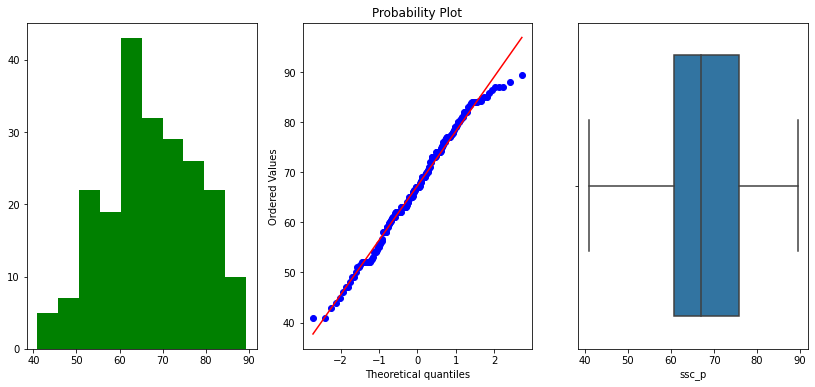

Distribution plots for col hsc_p


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


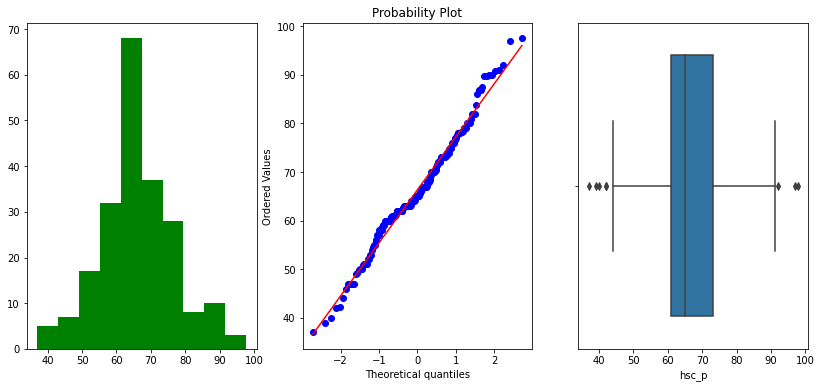

Distribution plots for col degree_p


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


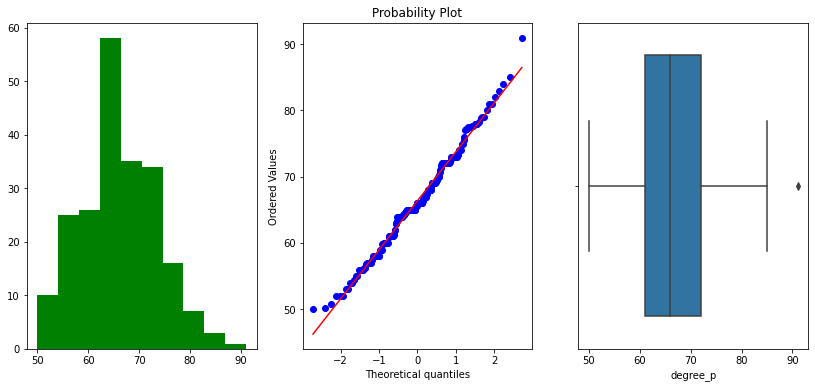

Distribution plots for col etest_p


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


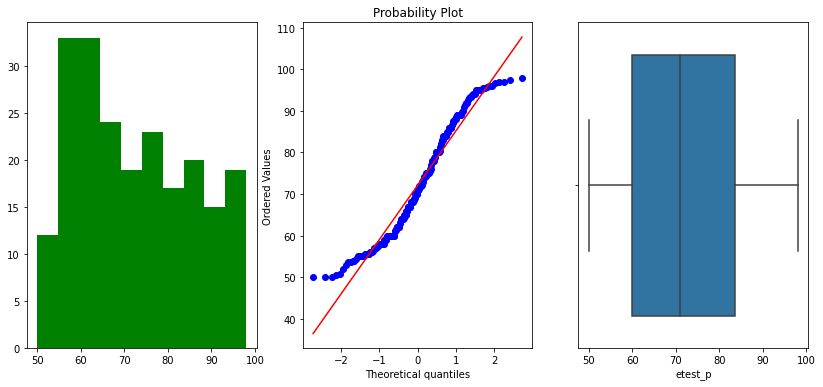

Distribution plots for col mba_p


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


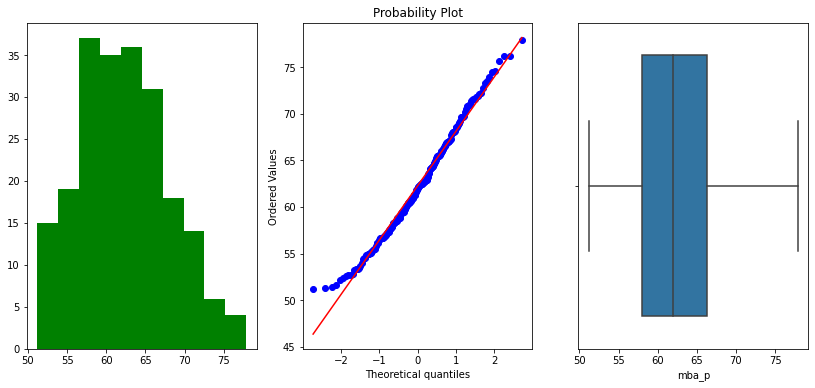

Distribution plots for col salary


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


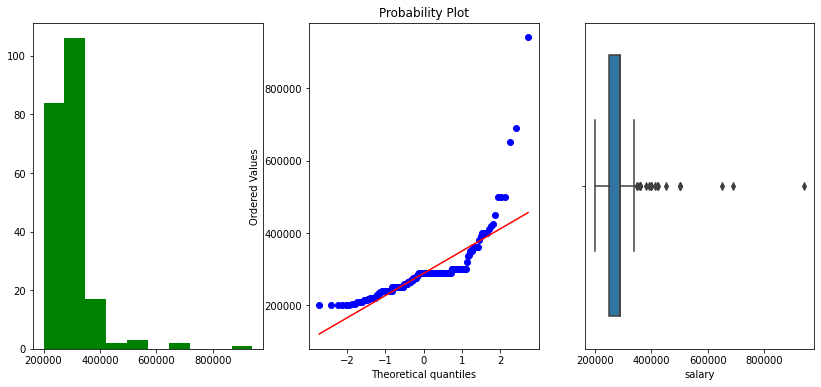

In [35]:
import scipy.stats as stats

def get_plots(df, col):
  plt.figure(figsize=(14,6))
  plt.subplot(1,3,1)
  plt.hist(df[col], color="Green")

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist="norm", plot=plt)

  plt.subplot(1,3,3)
  sns.boxplot(df[col])

  plt.show()

for col in num_vars[1:]:
  print(f"Distribution plots for col {col}")
  get_plots(df, col)
  print("="*100)

## Feature Selection

In [36]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


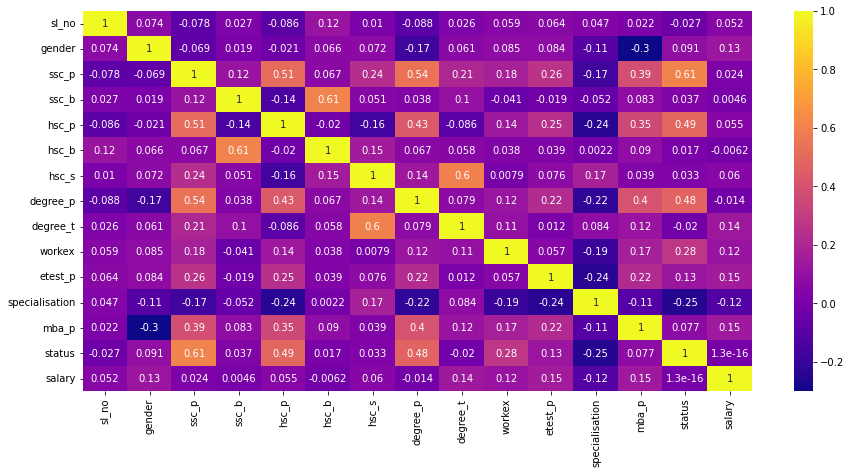

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap="plasma")

In [38]:
"""
I will drop the salary column as the salary is only applicable after
the student has been placed.  Therefore it gives little insight into 
our model. 
"""

data = df.copy()
test = data["status"]
train = data.drop(["status", "salary"], axis=1)
train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

ec = ExtraTreesClassifier()
ec.fit(train, test)

ExtraTreesClassifier()

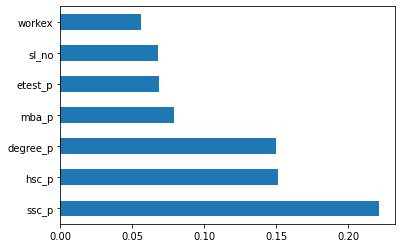

In [40]:
feat_bar = pd.Series(ec.feature_importances_, index=train.columns)
feat_bar.nlargest(7).plot(kind = "barh")

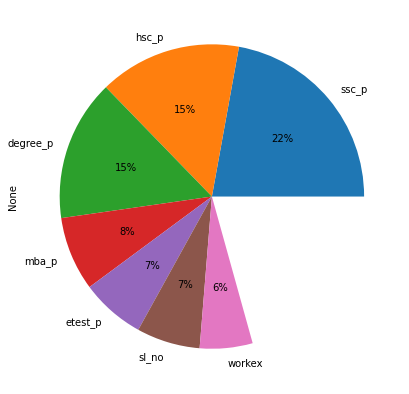

In [41]:
feat_bar.nlargest(7).plot(kind="pie", autopct="%1.0f%%", figsize=(15,7))

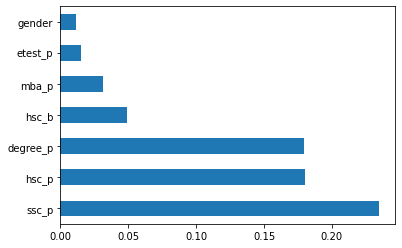

In [42]:
from sklearn.feature_selection import mutual_info_classif

mc = mutual_info_classif(train, test)
ax = pd.Series(mc, index=train.columns)
ax.nlargest(7).plot(kind="barh")

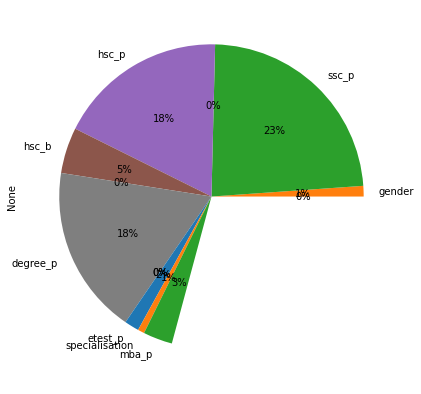

In [43]:
pd.Series(mc, index=train.columns).plot(kind="pie", autopct="%1.0f%%", figsize=(15,7))

In [44]:
"""
Select the top 10 features in both cases and then I will
do an intersection to get at least 5 most contributing features
"""

feat_col = list(feat_bar.nlargest(10).index)
mut_classif = list(ax.nlargest(10).index)
common_cols = list(set(feat_col).intersection(set(mut_classif)))
print(common_cols)

['gender', 'hsc_p', 'sl_no', 'etest_p', 'ssc_p', 'degree_p', 'mba_p', 'specialisation']


In [45]:
train = df[common_cols]
train.head()

,gender,hsc_p,sl_no,etest_p,ssc_p,degree_p,mba_p,specialisation
0,1,91.00,1,55.0,67.00,58.00,58.80,1
1,1,78.33,2,86.5,79.33,77.48,66.28,0
2,1,68.00,3,75.0,65.00,64.00,57.80,0
3,1,52.00,4,66.0,56.00,52.00,59.43,1
4,1,73.60,5,96.8,85.80,73.30,55.50,0


## Model Building

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

[Text(0.2897727272727273, 0.95, 'ssc_p <= 56.44\ngini = 0.426\nsamples = 172\nvalue = [53, 119]\nclass = Placed'),
 Text(0.13636363636363635, 0.85, 'degree_p <= 70.655\ngini = 0.185\nsamples = 29\nvalue = [26, 3]\nclass = Not_placed'),
 Text(0.09090909090909091, 0.75, 'hsc_p <= 58.5\ngini = 0.133\nsamples = 28\nvalue = [26, 2]\nclass = Not_placed'),
 Text(0.045454545454545456, 0.65, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = Not_placed'),
 Text(0.13636363636363635, 0.65, 'hsc_p <= 61.665\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = Not_placed'),
 Text(0.09090909090909091, 0.55, 'etest_p <= 89.33\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Placed'),
 Text(0.045454545454545456, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Placed'),
 Text(0.13636363636363635, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not_placed'),
 Text(0.18181818181818182, 0.55, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Not_placed'),
 Text(0.18181818181818182, 0.75

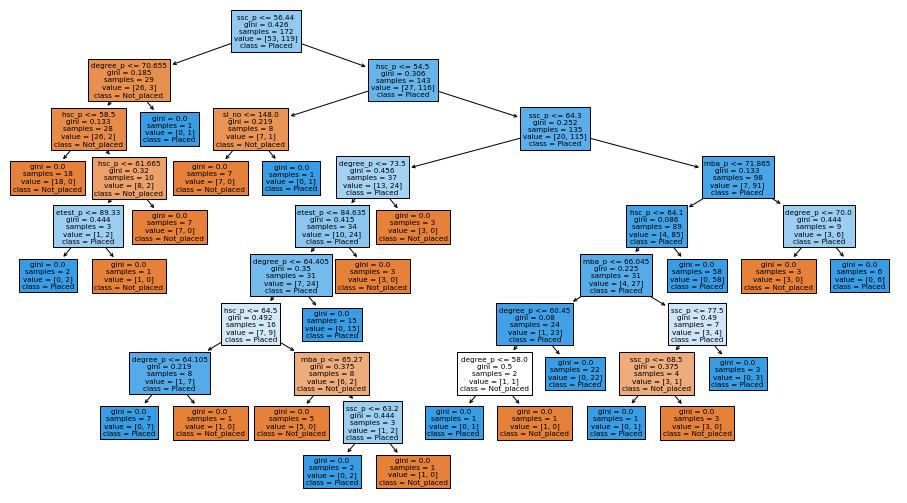

In [48]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc, class_names=["Not_placed", "Placed"], filled=True, feature_names=train.columns)

In [49]:
cost_path = dc.cost_complexity_pruning_path(train, test)
ccp_alpha, impurities = cost_path.ccp_alphas, cost_path.impurities

In [50]:
model_list = []
for alpha in ccp_alpha:
  dc = DecisionTreeClassifier(ccp_alpha=alpha)
  dc.fit(X_train, y_train)
  model_list.append(dc)

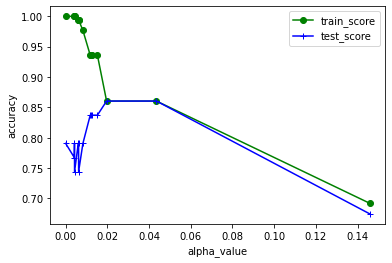

In [51]:
train_score = [clf.score(X_train, y_train) for clf in model_list]
test_score = [clf.score(X_test, y_test) for clf in model_list]

plt.xlabel("alpha_value")
plt.ylabel("accuracy")
plt.plot(ccp_alpha, train_score, label="train_score", marker="o", color="Green")
plt.plot(ccp_alpha, test_score, label="test_score", marker="+", color="Blue")
plt.legend()
plt.show()

[Text(0.3333333333333333, 0.875, 'ssc_p <= 56.44\ngini = 0.426\nsamples = 172\nvalue = [53, 119]\nclass = Placed'),
 Text(0.16666666666666666, 0.625, 'gini = 0.185\nsamples = 29\nvalue = [26, 3]\nclass = Not_placed'),
 Text(0.5, 0.625, 'hsc_p <= 54.5\ngini = 0.306\nsamples = 143\nvalue = [27, 116]\nclass = Placed'),
 Text(0.3333333333333333, 0.375, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Not_placed'),
 Text(0.6666666666666666, 0.375, 'ssc_p <= 64.3\ngini = 0.252\nsamples = 135\nvalue = [20, 115]\nclass = Placed'),
 Text(0.5, 0.125, 'gini = 0.456\nsamples = 37\nvalue = [13, 24]\nclass = Placed'),
 Text(0.8333333333333334, 0.125, 'gini = 0.133\nsamples = 98\nvalue = [7, 91]\nclass = Placed')]

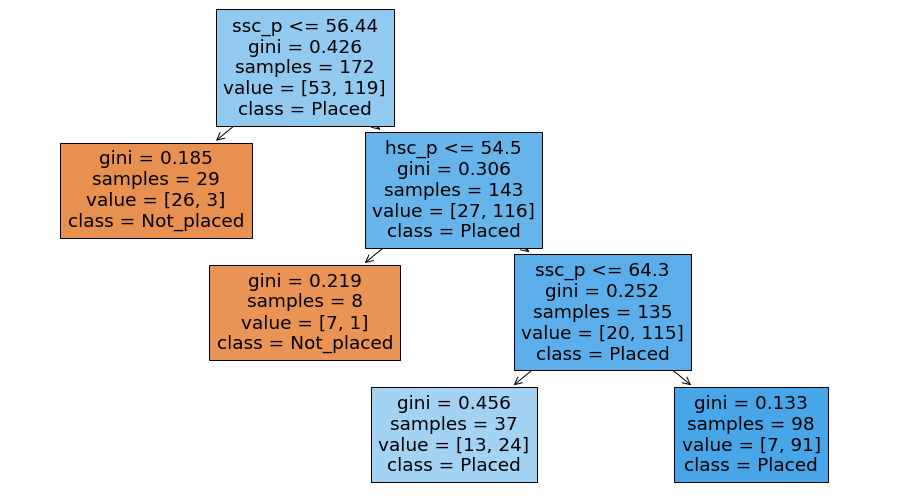

In [52]:
dc = DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc, class_names=["Not_placed", "Placed"], filled=True, feature_names=train.columns)

In [57]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [ ]:
scores = []
for model_name,mp in params.items():
    
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

In [59]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.820168,"(DecisionTreeClassifier(ccp_alpha=0.0185, max_..."
1,logistic,0.855294,"LogisticRegression(max_iter=139, multi_class='..."
2,D-tree,0.814118,"DecisionTreeClassifier(ccp_alpha=0.0185, crite..."
3,SVM,0.855126,"SVC(C=0.5, kernel='poly', max_iter=111, tol=0.75)"


In [60]:
scores

[{'best_estimator': RandomForestClassifier(ccp_alpha=0.0185, max_depth=30, min_samples_leaf=10,
                         min_samples_split=10, n_estimators=533),
  'best_score': 0.8201680672268907,
  'model_name': 'RandomForest'},
 {'best_estimator': LogisticRegression(max_iter=139, multi_class='ovr', tol=1e-05),
  'best_score': 0.855294117647059,
  'model_name': 'logistic'},
 {'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0185, criterion='entropy',
                         max_features='auto', min_samples_leaf=12,
                         min_samples_split=5),
  'best_score': 0.8141176470588235,
  'model_name': 'D-tree'},
 {'best_estimator': SVC(C=0.5, kernel='poly', max_iter=111, tol=0.75),
  'best_score': 0.8551260504201681,
  'model_name': 'SVM'}]

In [68]:
# random forest model


rf = RandomForestClassifier(ccp_alpha=0.0185, max_depth=30, min_samples_leaf=10,
                         min_samples_split=10, n_estimators=533)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8604651162790697


In [69]:
# logistic regression

lr = LogisticRegression(C=0.25, max_iter=111, multi_class='ovr', solver='newton-cg',
                     tol=1e-05)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8837209302325582


In [70]:
# SVC

svc = SVC(C=0.5, kernel='poly', max_iter=111, tol=0.75)

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8837209302325582


In [71]:
# decision tree

dc = DecisionTreeClassifier(ccp_alpha=0.0185, criterion='entropy',
                         max_features='auto', min_samples_leaf=12,
                         min_samples_split=5)
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.627906976744186


In [72]:
print(metrics.classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.90      0.93      0.92        29

    accuracy                           0.88        43
   macro avg       0.87      0.86      0.87        43
weighted avg       0.88      0.88      0.88        43



In [73]:
print(metrics.classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.90      0.93      0.92        29

    accuracy                           0.88        43
   macro avg       0.87      0.86      0.87        43
weighted avg       0.88      0.88      0.88        43



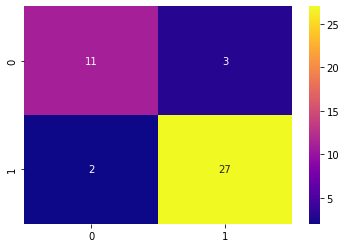

In [75]:
cn = metrics.confusion_matrix(y_test,svc.predict(X_test))
sns.heatmap(cn,annot=True,cmap='plasma')

# Model Testing

In [77]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(svc.predict([traindata[i]]))
    
predicted

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [78]:
resultdf = train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,gender,hsc_p,sl_no,etest_p,ssc_p,degree_p,mba_p,specialisation,Actual,Predicted
0,1,91.00,1,55.0,67.00,58.00,58.80,1,1,1
1,1,78.33,2,86.5,79.33,77.48,66.28,0,1,1
2,1,68.00,3,75.0,65.00,64.00,57.80,0,1,1
3,1,52.00,4,66.0,56.00,52.00,59.43,1,0,0
4,1,73.60,5,96.8,85.80,73.30,55.50,0,1,1


In [79]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [80]:
resultdf['Predicted'].value_counts()

1    160
0     55
Name: Predicted, dtype: int64

In [82]:
mappings

{'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'gender': {'F': 0, 'M': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'status': {'Not Placed': 0, 'Placed': 1},
 'workex': {'No': 0, 'Yes': 1}}

### Predicted Probability using Logistic Regression

In [85]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(lr.predict_proba([traindata[i]]))
    
predicted

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 

[array([[0.04576603, 0.95423397]]),
 array([[0.00516494, 0.99483506]]),
 array([[0.17011265, 0.82988735]]),
 array([[0.97211742, 0.02788258]]),
 array([[0.00103613, 0.99896387]]),
 array([[0.53748877, 0.46251123]]),
 array([[0.81636717, 0.18363283]]),
 array([[0.01889048, 0.98110952]]),
 array([[0.01449964, 0.98550036]]),
 array([[0.19560638, 0.80439362]]),
 array([[0.81366357, 0.18633643]]),
 array([[0.02561021, 0.97438979]]),
 array([[0.98939067, 0.01060933]]),
 array([[0.05778032, 0.94221968]]),
 array([[0.93601612, 0.06398388]]),
 array([[0.20464658, 0.79535342]]),
 array([[0.29247537, 0.70752463]]),
 array([[0.87351218, 0.12648782]]),
 array([[0.68483181, 0.31516819]]),
 array([[0.75641891, 0.24358109]]),
 array([[0.22661581, 0.77338419]]),
 array([[0.00772677, 0.99227323]]),
 array([[0.37973992, 0.62026008]]),
 array([[0.19383711, 0.80616289]]),
 array([[0.00414066, 0.99585934]]),
 array([[0.99452017, 0.00547983]]),
 array([[0.02403619, 0.97596381]]),
 array([[0.24123682, 0.75876

In [86]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.04576603, 0.95423397]), 0.04576602738062985, 0.9542339726193702)

In [87]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,gender,hsc_p,sl_no,etest_p,ssc_p,degree_p,mba_p,specialisation,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,91.00,1,55.0,67.00,58.00,58.80,1,1,1,0.045766,0.954234
1,1,78.33,2,86.5,79.33,77.48,66.28,0,1,1,0.005165,0.994835
2,1,68.00,3,75.0,65.00,64.00,57.80,0,1,1,0.170113,0.829887
3,1,52.00,4,66.0,56.00,52.00,59.43,1,0,0,0.972117,0.027883
4,1,73.60,5,96.8,85.80,73.30,55.50,0,1,1,0.001036,0.998964
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,82.00,211,91.0,80.60,77.60,74.49,0,1,1,0.004592,0.995408
211,1,60.00,212,74.0,58.00,72.00,53.62,0,1,1,0.108054,0.891946
212,1,67.00,213,59.0,67.00,73.00,69.72,0,1,1,0.089211,0.910789
213,0,66.00,214,70.0,74.00,58.00,60.23,1,1,1,0.150442,0.849558


In [88]:
# saving the model

import pickle
file = open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()